In [1]:
with open("prompts.txt") as f:
    prompts = f.readlines()
len(prompts)

58

In [9]:
len(set(prompts))

58

### image size filter

In [35]:
import os  
from PIL import Image  
  
def get_image_dimensions(image_path):  
    with Image.open(image_path) as img:  
        return img.width, img.height  
  
def find_max_dimensions_and_pixels(directory):  
    max_width = 0  
    max_height = 0  
    max_pixels = 0  
  
    for filename in os.listdir(directory):  
        if filename.endswith('.png'):  
            image_path = os.path.join(directory, filename)  
            try:  
                width, height = get_image_dimensions(image_path)  
                pixels = width * height  
  
                if width > max_width:  
                    max_width = width  
                if height > max_height:  
                    max_height = height  
                if pixels > max_pixels:  
                    max_pixels = pixels  
  
            except Exception as e:  
                print(f"Could not process image {image_path}: {e}")  
  
    return max_width, max_height, max_pixels  
  
# 指定您的目录路径  
directory = '/home/v-lingjiang/project/ChartMimic/dataset/ori_500'  
  
# 获取最大尺寸和像素数  
max_width, max_height, max_pixels = find_max_dimensions_and_pixels(directory)  
  
print(f"Max Width: {max_width}")  
print(f"Max Height: {max_height}")  
print(f"Max Pixels: {max_pixels}")  

Max Width: 2988
Max Height: 1429
Max Pixels: 2829636


In [7]:
prompts[:2]

["Imagine you're tasked with replicating a scientific graph using Python's matplotlib. The image dimensions should be set using figsize=({width}, {height}). How would you construct the necessary code?\n",
 'Could you craft a Python script using matplotlib to replicate the visual representation provided in the attached image? Ensure the figure size matches the original by setting figsize=({width}, {height}).\n']

In [37]:
import json
save_path = "/mnt/lingjiejiang/multimodal_code/data/chart_data/revised_data_existing_images_123k.json"
with open(save_path, 'r') as f:
    data = json.load(f)

In [39]:
import json  
from PIL import Image  
from tqdm import tqdm  
  
# 设置合理的最大像素数和最大宽高  
2829636
MAX_PIXELS = 3000000  # 例如：2560 * 1440  
MAX_WIDTH = 1500  
MAX_HEIGHT = 1500 
  
# 读取JSON文件  
save_path = "/mnt/lingjiejiang/multimodal_code/data/chart_data/revised_data_existing_images_123k.json"  
with open(save_path, 'r') as f:  
    data = json.load(f)  
  
# 遍历每个数据项  
filtered_data = []  
for item in tqdm(data):  
    keep_item = True  
    image_path = item.get('images')  
    if image_path:  
        try:  
            with Image.open(image_path) as img:  
                # 检查图片尺寸  
                if img.width > MAX_WIDTH or img.height > MAX_HEIGHT or (img.width * img.height) > MAX_PIXELS:  
                    keep_item = False  
                    # print(f"Image {image_path} exceeds size limits and will be removed.")  
        except Exception as e:  
            print(f"Could not process image {image_path}: {e}")  
            keep_item = False  
    if keep_item:  
        filtered_data.append(item)  
  
# 输出过滤后的数据长度  
print(f"Number of items after filtering: {len(filtered_data)}")  
  
# 将过滤后的数据保存回JSON文件  
filtered_save_path = f"/mnt/lingjiejiang/multimodal_code/data/chart_data/revised_data_{len(filtered_data) // 1000}k_big_img_filtered.json"  
with open(filtered_save_path, "w") as f:  
    json.dump(filtered_data, f, indent=0)  

  3%|▎         | 3167/123715 [01:01<38:45, 51.83it/s]  


KeyboardInterrupt: 

In [1]:
# filtered_data = [2] * 123000
# f"/mnt/lingjiejiang/multimodal_code/data/chart_data/revised_data_existing_images_{len(filtered_data) // 1000}k_filtered.json"  

In [3]:
import json
filtered_path = "/mnt/lingjiejiang/multimodal_code/data/chart_data/revised_data_52k_big_img_filtered.json"
with open(filtered_path, 'r') as f:
    filtered_data = json.load(f)
len(filtered_data)

52475

In [5]:
filtered_data[:2]

[{'index': 3,
  'revised_text': "import matplotlib.pyplot as plt  \nimport numpy as np  \nfrom matplotlib import cm  \n\n# Sample Hamiltonian matrix\nH = np.array([[1, 2, 3, 4], [2, 5, 6, 7], [3, 6, 8, 9], [4, 7, 9, 10]])\n\n# Plot the absolute value of the Hamiltonian matrix\nplt.figure(figsize=(6.0, 4.0))  \nplt.matshow(abs(H), cmap=cm.jet, fignum=1)  \nplt.title('Hamiltonian')  \nplt.colorbar()  \nplt.show()",
  'category': 'Heatmap',
  'chart_size': [6.0, 4.0],
  'gpt_answer': "<REVISED CODE BEGIN>  \nimport matplotlib.pyplot as plt  \nimport numpy as np  \nfrom matplotlib import cm  \n\n# Sample Hamiltonian matrix\nH = np.array([[1, 2, 3, 4], [2, 5, 6, 7], [3, 6, 8, 9], [4, 7, 9, 10]])\n\n# Plot the absolute value of the Hamiltonian matrix\nplt.figure(figsize=(6.0, 4.0))  \nplt.matshow(abs(H), cmap=cm.jet, fignum=1)  \nplt.title('Hamiltonian')  \nplt.colorbar()  \nplt.show()  \n<REVISED CODE END>  \n\n<CATEGORY>: [Heatmap]  \n<CHART SIZE>: (6.0, 4.0)  ",
  'max_stars_repo_path': '

In [6]:
import json  
import random  
  
# 路径到你的JSON数据文件  
data_path = "/mnt/lingjiejiang/multimodal_code/data/chart_data/revised_data_52k_big_img_filtered.json"   
output_path = "/mnt/lingjiejiang/multimodal_code/data/chart_data/revised_data_existing_images_52k_sharegpt_format.json"    

# 读取JSON数据  
with open(data_path, 'r') as f:  
    data = json.load(f)  
  
# 读取提示  
with open("prompts.txt") as f:  
    prompts = f.readlines()  
  
# 对每个数据项进行处理  
for item in data:  
    # 随机选择一个提示  
    selected_prompt = random.choice(prompts)  
      
    # 获取当前数据项的chart_size  
    chart_size = item.get('chart_size', [6.0, 12.0])  
      
    # 检查每个尺寸是否为整数  
    width = int(chart_size[0]) if chart_size[0].is_integer() else chart_size[0]  
    height = int(chart_size[1]) if chart_size[1].is_integer() else chart_size[1]  
      
    # 替换提示中的{width}和{height}  
    new_prompt = selected_prompt.replace('{width}', str(width)).replace('{height}', str(height))  
      
    # 将新提示存入数据项的'prompt'键中  
    item['prompt'] = new_prompt.strip()  

    # 添加 messages 键  
    item['messages'] = [  
        {  
            'content': '<image>\n' + new_prompt,  
            'role': 'user'  
        },  
        {  
            'content': item.get('formatted_text', ''),  
            'role': 'assistant'  
        }  
    ]    

    item["images"] = [item["images"]]
    item.pop("gpt_answer")
    item.pop("lang")
# 如果需要，可以将修改后的数据保存回文件  
with open(output_path, 'w') as f:  
    json.dump(data, f, indent=0)  
  
# 打印第一个数据项以验证输出  
# print(data[0])  

In [8]:
# len(data)
data[:2]

[{'index': 3,
  'revised_text': "import matplotlib.pyplot as plt  \nimport numpy as np  \nfrom matplotlib import cm  \n\n# Sample Hamiltonian matrix\nH = np.array([[1, 2, 3, 4], [2, 5, 6, 7], [3, 6, 8, 9], [4, 7, 9, 10]])\n\n# Plot the absolute value of the Hamiltonian matrix\nplt.figure(figsize=(6.0, 4.0))  \nplt.matshow(abs(H), cmap=cm.jet, fignum=1)  \nplt.title('Hamiltonian')  \nplt.colorbar()  \nplt.show()",
  'category': 'Heatmap',
  'chart_size': [6.0, 4.0],
  'max_stars_repo_path': 'cw_EPR.py',
  'max_stars_repo_name': 'tkeller12/spin_physics',
  'max_stars_count': 0,
  'id': '2234',
  'text': "# <NAME>\n# S = 1/2, I = 1/2\n# Spin 1/2 electron coupled to spin 1/2 nuclei\n\nimport numpy as np\nfrom scipy.linalg import expm\nfrom matplotlib.pylab import *\nfrom matplotlib import cm\n\nsigma_x = 0.5*np.r_[[[0, 1],[1, 0]]]\nsigma_y = 0.5*np.r_[[[0,-1j],[1j, 0]]]\nsigma_z = 0.5*np.r_[[[1, 0],[0, -1]]]\nIdentity = np.eye(2)\n\n\nSx = np.kron(sigma_x, Identity)\nSy = np.kron(sigma_y, 

In [1]:
import json
output_path = "/mnt/lingjiejiang/multimodal_code/data/chart_data/revised_data_existing_images_52k_sharegpt_format.json"    
with open(output_path, 'r') as f:
    data = json.load(f)
len(data)

52475

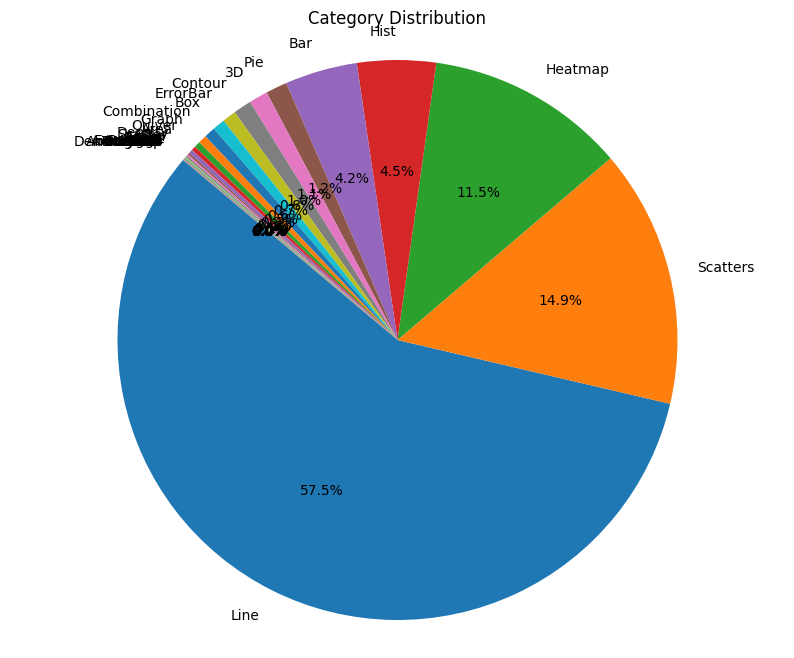

In [4]:
import json  
from collections import Counter  
import matplotlib.pyplot as plt  
  
# 读取 JSON 数据  
output_path = "/mnt/lingjiejiang/multimodal_code/data/chart_data/revised_data_existing_images_52k_sharegpt_format.json"  
with open(output_path, 'r') as f:  
    data = json.load(f)  
  
# 假设每个数据项中有一个 'category' 字段  
# 过滤掉单词超过10个的类别  
categories = [item['category'] for item in data if len(item['category'].split()) <= 10]  
  
# 统计每个类别的数量  
category_counts = Counter(categories)  
  
# 将类别数量按从大到小排序  
sorted_category_counts = category_counts.most_common()  
  
# 将结果写入文件  
with open('category_counts.txt', 'w') as f:  
    for category, count in sorted_category_counts:  
        f.write(f"{category}: {count}\n")  
  
# 绘制饼图  
labels, sizes = zip(*sorted_category_counts)  
plt.figure(figsize=(10, 8))  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)  
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.  
plt.title('Category Distribution')  
plt.show()  

In [7]:
import json  
import os  
import shutil  
from collections import defaultdict  
import random  
import re  
  
# 读取 JSON 数据  
output_path = "/mnt/lingjiejiang/multimodal_code/data/chart_data/revised_data_existing_images_52k_sharegpt_format.json"  
with open(output_path, 'r') as f:  
    data = json.load(f)  
  
# 定义一个函数来检查类别名称是否合法  
def is_valid_category(category):  
    # 允许字母、数字、下划线和空格  
    return bool(re.match(r'^[A-Za-z0-9_ ]+$', category))  
  
# 按类别分组数据，只包括合法的类别  
category_dict = defaultdict(list)  
for item in data:  
    if is_valid_category(item['category']):  
        category_dict[item['category']].append(item)  
  
# 创建目标目录并处理每个类别  
for category, items in category_dict.items():  
    # 随机抽取3个项目  
    selected_items = random.sample(items, min(10, len(items)))  
  
    # 创建目录，如果不存在  
    category_path = os.path.join('img_preview', category)  
    os.makedirs(category_path, exist_ok=True)  
  
    for item in selected_items:  
        # 获取图片路径和目标路径  
        image_path = item['images'][0]  
        image_name = os.path.basename(image_path)  
        base_name, _ = os.path.splitext(image_name)  
        py_file_name = f"{base_name}.py"  
        target_image_path = os.path.join(category_path, image_name)  
        target_py_path = os.path.join(category_path, py_file_name)  
  
        # 复制图片  
        shutil.copy(image_path, target_image_path)  
  
        # 写入 formatted_text  
        with open(target_py_path, 'w') as py_file:  
            py_file.write(item['formatted_text'])  
  

In [9]:
import json  
import os  
import shutil  
from collections import defaultdict  
import random  
import re  
  
# 读取 JSON 数据  
output_path = "/mnt/lingjiejiang/multimodal_code/data/chart_data/revised_data_existing_images_52k_sharegpt_format.json"  
with open(output_path, 'r') as f:  
    data = json.load(f)  
  
# 定义合法类别的集合  
valid_categories = {  
    'Bar', 'Line', 'ErrorBar', 'Heatmap', 'Box', 'Scatters', 'Hist', 'Radar',   
    '3D', 'Pie', 'ErrorPoint', 'Violin', 'Area', 'Contour', 'Density', 'Graph',   
    'Quiver', 'Treemap', 'Combination', 'HR', 'Multidiff', 'PIP'  
}  
  
# 定义一个函数来检查类别名称是否合法  
def is_valid_category(category):  
    return bool(re.match(r'^[A-Za-z0-9_ ]+$', category))  
  
# 收集所有符合条件的类别  
all_categories = set()  
category_dict = defaultdict(list)  
  
for item in data:  
    category = item['category']  
    if is_valid_category(category):  
        all_categories.add(category)  
        if category in valid_categories:  
            category_dict[category].append(item)  
  
# 创建目标目录并处理每个类别  
img_filter_path = 'img_filter'  
os.makedirs(img_filter_path, exist_ok=True)  
  
for category, items in category_dict.items():  
    # 随机抽取3个项目  
    selected_items = random.sample(items, min(5, len(items)))  
  
    # 创建目录，如果不存在  
    category_path = os.path.join(img_filter_path, category)  
    os.makedirs(category_path, exist_ok=True)  
  
    for item in selected_items:  
        # 获取图片路径和目标路径  
        image_path = item['images'][0]  
        image_name = os.path.basename(image_path)  
        base_name, _ = os.path.splitext(image_name)  
        py_file_name = f"{base_name}.py"  
        target_image_path = os.path.join(category_path, image_name)  
        target_py_path = os.path.join(category_path, py_file_name)  
  
        # 复制图片  
        shutil.copy(image_path, target_image_path)  
  
        # 写入 formatted_text  
        with open(target_py_path, 'w') as py_file:  
            py_file.write(item['formatted_text'])  
  
# 记录未出现过的合法类别  
unused_categories = valid_categories - all_categories  
  
with open('unused_categories.txt', 'w') as f:  
    for category in unused_categories:  
        f.write(f"{category}\n")  

In [5]:
import json  
import os  
import shutil  
import re  
  
# 读取 JSON 数据  
output_path = "/mnt/lingjiejiang/multimodal_code/data/chart_data/revised_data_existing_images_52k_sharegpt_format.json"  
with open(output_path, 'r') as f:  
    data = json.load(f)  
  
# 定义合法类别的集合  
valid_categories = {  
    'Bar', 'Line', 'ErrorBar', 'Heatmap', 'Box', 'Scatters', 'Hist', 'Radar',   
    '3D', 'Pie', 'ErrorPoint', 'Violin', 'Area', 'Contour', 'Density', 'Graph',   
    'Quiver', 'Treemap', 'Combination', 'HR', 'Multidiff', 'PIP'  
}  
  
# 定义一个函数来检查类别名称是否合法  
def is_valid_category(category):  
    return bool(re.match(r'^[A-Za-z0-9_ ]+$', category))  
  
# 创建目标目录  
img_filter_path = 'img_filter'  
os.makedirs(img_filter_path, exist_ok=True)  
  
# 筛选和处理数据  
for item in data:  
    category = item['category']  
    if is_valid_category(category) and category in valid_categories:  
        # 创建目录，如果不存在  
        category_path = os.path.join(img_filter_path, category)  
        os.makedirs(category_path, exist_ok=True)  
  
        # 获取图片路径和目标路径  
        image_path = item['images'][0]  
        image_name = os.path.basename(image_path)  
        base_name, _ = os.path.splitext(image_name)  
        py_file_name = f"{base_name}.py"  
        target_image_path = os.path.join(category_path, image_name)  
        target_py_path = os.path.join(category_path, py_file_name)  
  
        # 复制图片  
        shutil.copy(image_path, target_image_path)  
  
        # 写入 formatted_text  
        with open(target_py_path, 'w') as py_file:  
            py_file.write(item['formatted_text'])  

[{'index': 3,
  'revised_text': "import matplotlib.pyplot as plt  \nimport numpy as np  \nfrom matplotlib import cm  \n\n# Sample Hamiltonian matrix\nH = np.array([[1, 2, 3, 4], [2, 5, 6, 7], [3, 6, 8, 9], [4, 7, 9, 10]])\n\n# Plot the absolute value of the Hamiltonian matrix\nplt.figure(figsize=(6.0, 4.0))  \nplt.matshow(abs(H), cmap=cm.jet, fignum=1)  \nplt.title('Hamiltonian')  \nplt.colorbar()  \nplt.show()",
  'category': 'Heatmap',
  'chart_size': [6.0, 4.0],
  'max_stars_repo_path': 'cw_EPR.py',
  'max_stars_repo_name': 'tkeller12/spin_physics',
  'max_stars_count': 0,
  'id': '2234',
  'text': "# <NAME>\n# S = 1/2, I = 1/2\n# Spin 1/2 electron coupled to spin 1/2 nuclei\n\nimport numpy as np\nfrom scipy.linalg import expm\nfrom matplotlib.pylab import *\nfrom matplotlib import cm\n\nsigma_x = 0.5*np.r_[[[0, 1],[1, 0]]]\nsigma_y = 0.5*np.r_[[[0,-1j],[1j, 0]]]\nsigma_z = 0.5*np.r_[[[1, 0],[0, -1]]]\nIdentity = np.eye(2)\n\n\nSx = np.kron(sigma_x, Identity)\nSy = np.kron(sigma_y, 

In [1]:
import json  
import re  
# 读取 JSON 数据  
output_path = "/mnt/lingjiejiang/multimodal_code/data/chart_data/revised_data_existing_images_52k_sharegpt_format.json"  
with open(output_path, 'r') as f:  
    data = json.load(f)  
  
# 定义合法类别的集合  
# valid_categories = {  
#     'Bar', 'Line', 'ErrorBar', 'Heatmap', 'Box', 'Scatters', 'Hist', 'Radar',   
#     '3D', 'Pie', 'ErrorPoint', 'Violin', 'Area', 'Contour', 'Density', 'Graph',   
#     'Quiver', 'Treemap', 'Combination', 'HR', 'Multidiff', 'PIP'  
# }  
valid_categories = {  
    'Bar', 'Line', 'ErrorBar', 'Heatmap', 'Box', 'Scatters', 'Hist', 'Radar',   
    '3D', 'Pie', 'ErrorPoint', 'Violin', 'Area', 'Contour', 'Density', 'Graph',   
    'Quiver', 'Treemap', 'Combination', 'Multidiff', 'PIP'  
}  
# 定义一个函数来检查类别名称是否合法  
def is_valid_category(category):  
    return bool(re.match(r'^[A-Za-z0-9_ ]+$', category))  
  
# 筛选出符合条件的项目  
filtered_items = [  
    item for item in data  
    if is_valid_category(item['category']) and item['category'] in valid_categories  
]  
  
# 现在，filtered_items 包含所有符合条件的项目  
print(f"Filtered {len(filtered_items)} items from the dataset.")  

Filtered 52000 items from the dataset.


In [21]:
import json
save_path = "/mnt/lingjiejiang/multimodal_code/data/chart_data/revised_data_existing_images_123k.json"
with open(save_path, 'r') as f:
    data = json.load(f)
valid_categories = {  
    'Bar', 'Line', 'ErrorBar', 'Heatmap', 'Box', 'Scatters', 'Hist', 'Radar',   
    '3D', 'Pie', 'ErrorPoint', 'Violin', 'Area', 'Contour', 'Density', 'Graph',   
    'Quiver', 'Treemap', 'Combination', 'Multidiff', 'PIP'  
}  
# 定义一个函数来检查类别名称是否合法  
def is_valid_category(category):  
    return bool(re.match(r'^[A-Za-z0-9_ ]+$', category))  
  
# 筛选出符合条件的项目  
filtered_items = [  
    item for item in data  
    if is_valid_category(item['category']) and item['category'] in valid_categories  
]  
  
# 现在，filtered_items 包含所有符合条件的项目  
print(f"Filtered {len(filtered_items)} items from the dataset.")  

Filtered 122489 items from the dataset.


In [24]:
len(data)

123715

In [25]:
data[:2]

[{'index': 0,
  'revised_text': "import matplotlib.pyplot as plt  \nimport numpy as np  \n\n# Sample data\nnp.random.seed(0)\nmatrix = np.random.rand(10, 10)\n\n# Create a new figure\nplt.figure(figsize=(6, 12))\n\n# Plot the heatmap\nplt.imshow(matrix, cmap='viridis', aspect='auto')\n\n# Set ticks\nplt.xticks(np.arange(10))\nplt.yticks(np.arange(10))\n\n# Show the plot\nplt.show()",
  'category': 'Heatmap',
  'chart_size': [6.0, 12.0],
  'gpt_answer': "<REVISED CODE BEGIN>  \nimport matplotlib.pyplot as plt  \nimport numpy as np  \n\n# Sample data\nnp.random.seed(0)\nmatrix = np.random.rand(10, 10)\n\n# Create a new figure\nplt.figure(figsize=(6, 12))\n\n# Plot the heatmap\nplt.imshow(matrix, cmap='viridis', aspect='auto')\n\n# Set ticks\nplt.xticks(np.arange(10))\nplt.yticks(np.arange(10))\n\n# Show the plot\nplt.show()  \n<REVISED CODE END>  \n\n<CATEGORY>: [Heatmap]  \n<CHART SIZE>: (6, 12)  ",
  'max_stars_repo_path': 'ml_datasets/utils.py',
  'max_stars_repo_name': 'abkoesdw/ml-d

In [26]:
import json  
import re  
  
# 定义要检查的随机函数、wordcloud 调用和 misc 导入语句的正则表达式  
random_patterns = re.compile(r'\brandn\b|\brandom\b|\brand\b')  
wordcloud_patterns = re.compile(r'\bwordcloud\b', re.IGNORECASE)  
misc_patterns = re.compile(r'\bimport\s+.*misc\b|\bfrom\s+.*misc\s+import\b', re.IGNORECASE)  
  
  

# 过滤掉包含随机函数调用、wordcloud 调用和 misc 导入的项  
filtered_rand_data = [  
    item for item in filtered_items  
    if not random_patterns.search(item.get('revised_text', '') )  
    and not wordcloud_patterns.search(item.get('revised_text', ''))  
    and not misc_patterns.search(item.get('revised_text', '') )  
] 



In [32]:
len(filtered_rand_data)

75569

In [33]:
categories_to_check = [  
    "Bar", "Line", "ErrorBar", "Heatmap", "Box", "Scatters", "Hist", "Radar",  
    "3D", "Pie", "ErrorPoint", "Violin", "Area", "Contour", "Density", "Graph",  
    "Quiver", "Treemap", "Combination", "HR", "Multidiff", "PIP"  
]  
filter_data = []
for item in filtered_rand_data:
    if item["category"] in valid_categories:
        filter_data.append(item)
len(filter_data)

75569

In [37]:
import json  
from collections import Counter  
  
# # 示例数据  
# data = [  
#     {'category': 'Heatmap', 'id': '2234'},  
#     {'category': 'Line', 'id': '2235'},  
#     {'category': 'Bar', 'id': '2236'},  
#     # 更多数据...  
# ]  
  
# 需要检查的类别列表  
categories_to_check = [  
    "Bar", "Line", "ErrorBar", "Heatmap", "Box", "Scatters", "Hist", "Radar",  
    "3D", "Pie", "ErrorPoint", "Violin", "Area", "Contour", "Density", "Graph",  
    "Quiver", "Treemap", "Combination", "HR", "Multidiff", "PIP"  
]  
  
# 统计每个类别的数量  
category_counts = Counter(item['category'] for item in filter_data)  
  
# 找出没有出现的类别  
categories_not_in_data = [category for category in categories_to_check if category not in category_counts]  
  
# 输出结果到文件  
output_path = 'category_statistics_all.txt'  
with open(output_path, 'w') as file:  
    file.write("Category Counts:\n")  
    for category, count in category_counts.items():  
        file.write(f"{category}: {count}\n")  
    file.write("\nCategories not in data:\n")  
    for category in categories_not_in_data:  
        file.write(f"{category}\n")  
  
print(f"统计结果已写入 {output_path}")  

统计结果已写入 category_statistics_all.txt


In [36]:
with open("/mnt/lingjiejiang/multimodal_code/data/chart_data/revised_75k_filtered.json", 'w') as f:
    json.dump(filter_data, f, indent=0)

In [28]:
# 定义匹配并替换 print 函数调用的正则表达式  
print_patterns = re.compile(r'\bprint\s*\(.*?\)', re.IGNORECASE)  
# 定义替换 print 函数调用的函数  
def replace_print(text):  
    return re.sub(print_patterns, 'REMOVED', text) 

for item in filtered_rand_data:
    item['revised_text'] = replace_print(item['revised_text'])


In [9]:
len(filtered_rand_data )

30479

In [34]:
filtered_rand_data[:2]

[{'index': 3,
  'revised_text': "import matplotlib.pyplot as plt  \nimport numpy as np  \nfrom matplotlib import cm  \n\n# Sample Hamiltonian matrix\nH = np.array([[1, 2, 3, 4], [2, 5, 6, 7], [3, 6, 8, 9], [4, 7, 9, 10]])\n\n# Plot the absolute value of the Hamiltonian matrix\nplt.figure(figsize=(6.0, 4.0))  \nplt.matshow(abs(H), cmap=cm.jet, fignum=1)  \nplt.title('Hamiltonian')  \nplt.colorbar()  \nplt.show()",
  'category': 'Heatmap',
  'chart_size': [6.0, 4.0],
  'max_stars_repo_path': 'cw_EPR.py',
  'max_stars_repo_name': 'tkeller12/spin_physics',
  'max_stars_count': 0,
  'id': '2234',
  'text': "# <NAME>\n# S = 1/2, I = 1/2\n# Spin 1/2 electron coupled to spin 1/2 nuclei\n\nimport numpy as np\nfrom scipy.linalg import expm\nfrom matplotlib.pylab import *\nfrom matplotlib import cm\n\nsigma_x = 0.5*np.r_[[[0, 1],[1, 0]]]\nsigma_y = 0.5*np.r_[[[0,-1j],[1j, 0]]]\nsigma_z = 0.5*np.r_[[[1, 0],[0, -1]]]\nIdentity = np.eye(2)\n\n\nSx = np.kron(sigma_x, Identity)\nSy = np.kron(sigma_y, 

In [12]:
output_filter_path = "/mnt/lingjiejiang/multimodal_code/data/chart_data/revised_30k_filtered.json"
with open(output_filter_path, 'w') as f:
    json.dump(filtered_rand_data, f, indent=0)

[{'index': 3,
  'revised_text': "import matplotlib.pyplot as plt  \nimport numpy as np  \nfrom matplotlib import cm  \n\n# Sample Hamiltonian matrix\nH = np.array([[1, 2, 3, 4], [2, 5, 6, 7], [3, 6, 8, 9], [4, 7, 9, 10]])\n\n# Plot the absolute value of the Hamiltonian matrix\nplt.figure(figsize=(6.0, 4.0))  \nplt.matshow(abs(H), cmap=cm.jet, fignum=1)  \nplt.title('Hamiltonian')  \nplt.colorbar()  \nplt.show()",
  'category': 'Heatmap',
  'chart_size': [6.0, 4.0],
  'max_stars_repo_path': 'cw_EPR.py',
  'max_stars_repo_name': 'tkeller12/spin_physics',
  'max_stars_count': 0,
  'id': '2234',
  'text': "# <NAME>\n# S = 1/2, I = 1/2\n# Spin 1/2 electron coupled to spin 1/2 nuclei\n\nimport numpy as np\nfrom scipy.linalg import expm\nfrom matplotlib.pylab import *\nfrom matplotlib import cm\n\nsigma_x = 0.5*np.r_[[[0, 1],[1, 0]]]\nsigma_y = 0.5*np.r_[[[0,-1j],[1j, 0]]]\nsigma_z = 0.5*np.r_[[[1, 0],[0, -1]]]\nIdentity = np.eye(2)\n\n\nSx = np.kron(sigma_x, Identity)\nSy = np.kron(sigma_y, 

In [17]:
import json  
from collections import Counter  
  
# # 示例数据  
# data = [  
#     {'category': 'Heatmap', 'id': '2234'},  
#     {'category': 'Line', 'id': '2235'},  
#     {'category': 'Bar', 'id': '2236'},  
#     # 更多数据...  
# ]  
  
# 需要检查的类别列表  
categories_to_check = [  
    "Bar", "Line", "ErrorBar", "Heatmap", "Box", "Scatters", "Hist", "Radar",  
    "3D", "Pie", "ErrorPoint", "Violin", "Area", "Contour", "Density", "Graph",  
    "Quiver", "Treemap", "Combination", "HR", "Multidiff", "PIP"  
]  
  
# 统计每个类别的数量  
category_counts = Counter(item['category'] for item in data)  
  
# 找出没有出现的类别  
categories_not_in_data = [category for category in categories_to_check if category not in category_counts]  
  
# 输出结果到文件  
output_path = 'category_statistics.txt'  
with open(output_path, 'w') as file:  
    file.write("Category Counts:\n")  
    for category, count in category_counts.items():  
        file.write(f"{category}: {count}\n")  
    file.write("\nCategories not in data:\n")  
    for category in categories_not_in_data:  
        file.write(f"{category}\n")  
  
print(f"统计结果已写入 {output_path}")  

统计结果已写入 category_statistics.txt


In [32]:
import json  
import os  
import shutil  
from collections import defaultdict  
import random  
import re  
  
# 读取 JSON 数据  
# output_path = "/mnt/lingjiejiang/multimodal_code/data/chart_data/revised_data_existing_images_52k_sharegpt_format.json"  
# with open(output_path, 'r') as f:  
#     data = json.load(f)  
  
# 定义一个函数来检查类别名称是否合法  
def is_valid_category(category):  
    # 允许字母、数字、下划线和空格  
    return bool(re.match(r'^[A-Za-z0-9_ ]+$', category))  
  
# 按类别分组数据，只包括合法的类别  
category_dict = defaultdict(list)  
for item in filtered_rand_data:  
    if is_valid_category(item['category']):  
        category_dict[item['category']].append(item)  
  
# 创建目标目录并处理每个类别  
for category, items in category_dict.items():  
    # 随机抽取3个项目  
    selected_items = random.sample(items, min(10, len(items)))  
  
    # 创建目录，如果不存在  
    category_path = "img_preview_sample10"
    code_path = "code_preview_sample10"
    os.makedirs(category_path, exist_ok=True)  
    os.makedirs(code_path, exist_ok=True)    
    for item in selected_items:  
        # 获取图片路径和目标路径  
        image_path = item['images'][0]  
        image_name = os.path.basename(image_path)  
        base_name, _ = os.path.splitext(image_name)  
        py_file_name = f"{base_name}.py"  
        target_image_path = os.path.join(category_path, image_name)  
        target_py_path = os.path.join(code_path, py_file_name)  
  
        # 复制图片  
        shutil.copy(image_path, target_image_path)  
  
        # 写入 formatted_text  
        with open(target_py_path, 'w') as py_file:  
            py_file.write(item['formatted_text'])  
  

In [24]:
len([item for item in data if item["prompt"] != ""])

123715

In [25]:
len([item for item in data if item["formatted_text"] != ""])

123715

### check wrap

In [21]:
import re

# 定义正则表达式来查找被 python 包裹的代码  
pattern = re.compile(r"```python(.*?)```", re.DOTALL)  

temp = []
# 遍历数据并替换 revised_text 中被包裹的代码  
for item in data:  
    revised_text = item.get('revised_text', '')  
    match = pattern.search(revised_text)  
    if match:  

        # 提取包裹的代码  
        code_content = match.group(1)  
        # 用提取的代码替换 revised_text  
        temp.append([item["revised_text"], code_content.strip()  ])
        # print("here")
        # item['revised_text'] = code_content.strip()  


In [22]:
temp

[]

In [ ]:

for idx, item in enumerate(data):
    reviesd_text = item.get("revised_text", "").strip()
    formatted_text = f"```python\n{reviesd_text}\n```"
    item["formatted_text"] = formatted_text
    item["index"] = idx

### Chart mimic filter

In [1]:
import os  
import ast  
  
def find_random_calls_in_file(file_path):  
    with open(file_path, 'r', encoding='utf-8') as file:  
        node = ast.parse(file.read(), filename=file_path)  
        for n in ast.walk(node):  
            if isinstance(n, ast.Call) and isinstance(n.func, ast.Attribute):  
                # Check if the function call is related to random  
                func_parts = []  
                current = n.func  
                while isinstance(current, ast.Attribute):  
                    func_parts.append(current.attr)  
                    current = current.value  
                if isinstance(current, ast.Name):  
                    func_parts.append(current.id)  
                  
                # Reverse to get the correct order  
                func_name = '.'.join(reversed(func_parts))  
  
                # Check if it's a random function call and not np.random.seed(0)  
                if func_name.startswith('random') or (func_name.startswith('np.random') and func_name != 'np.random.seed'):  
                    return True  
    return False  
  
def find_files_with_random_calls(directory):  
    random_files = []  
    for root, _, files in os.walk(directory):  
        for file in files:  
            if file.endswith('.py'):  
                file_path = os.path.join(root, file)  
                if find_random_calls_in_file(file_path):  
                    random_files.append(file_path)  
    return random_files  
  
# Specify the directory  
directory = '/home/v-lingjiang/project/ChartMimic/dataset/ori_500'  
random_files = find_files_with_random_calls(directory)  
  
print("Files with random calls (excluding np.random.seed(0)):")  
for file in random_files:  
    print(file)  

Files with random calls (excluding np.random.seed(0)):
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/scatter_17.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/CB_26.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/hist_14.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/graph_2.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/hist_1.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/hist_15.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/hist_11.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/CB_16.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/hist_17.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/violin_6.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/bar_44.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/bar_97.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/bar_98.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/violin_5.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500

In [3]:
import os  
import ast  
  
def find_imshow_calls_in_file(file_path):  
    with open(file_path, 'r', encoding='utf-8') as file:  
        try:  
            node = ast.parse(file.read(), filename=file_path)  
            for n in ast.walk(node):  
                if isinstance(n, ast.Call) and isinstance(n.func, ast.Attribute):  
                    # Check if the function call is imshow  
                    func_parts = []  
                    current = n.func  
                    while isinstance(current, ast.Attribute):  
                        func_parts.append(current.attr)  
                        current = current.value  
                    if isinstance(current, ast.Name):  
                        func_parts.append(current.id)  
                      
                    # Reverse to get the correct order  
                    func_name = '.'.join(reversed(func_parts))  
  
                    # Check if it's an imshow call  
                    if func_name.endswith('imshow'):  
                        return True  
        except SyntaxError:  
            # If there's a syntax error in the file, skip it  
            pass  
    return False  
  
def find_files_with_imshow_calls(directory):  
    imshow_files = []  
    for root, _, files in os.walk(directory):  
        for file in files:  
            if file.endswith('.py'):  
                file_path = os.path.join(root, file)  
                if find_imshow_calls_in_file(file_path):  
                    imshow_files.append(file_path)  
    return imshow_files  
  
# Specify the directory  
directory = '/home/v-lingjiang/project/ChartMimic/dataset/ori_500'  
imshow_files = find_files_with_imshow_calls(directory)  
  
print("Files with imshow calls:")  
for file in imshow_files:  
    print(file)  

Files with imshow calls:
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/heatmap_2.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/heatmap_16.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/multidiff_25.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/heatmap_17.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/HR_6.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/heatmap_23.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/heatmap_25.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/multidiff_7.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/heatmap_26.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/heatmap_28.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/heatmap_9.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/heatmap_22.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/multidiff_15.py
/home/v-lingjiang/project/ChartMimic/dataset/ori_500/heatmap_4.py
/home/v-lingjiang/project/ChartMimic/data

## seaborn check

In [13]:
import os  
import ast  
  
def find_seaborn_import_in_file(file_path):  
    with open(file_path, 'r', encoding='utf-8') as file:  
        try:  
            node = ast.parse(file.read(), filename=file_path)  
            for n in ast.walk(node):  
                # Check for import statements  
                if isinstance(n, ast.Import):  
                    for alias in n.names:  
                        if alias.name == 'seaborn':  
                            return True  
                # Check for from ... import statements  
                elif isinstance(n, ast.ImportFrom):  
                    if n.module == 'seaborn':  
                        return True  
        except SyntaxError:  
            # If there's a syntax error in the file, skip it  
            pass  
    return False  
  
def find_files_with_seaborn_import(directory):  
    seaborn_files = []  
    for root, _, files in os.walk(directory):  
        for file in files:  
            if file.endswith('.py'):  
                file_path = os.path.join(root, file)  
                if find_seaborn_import_in_file(file_path):  
                    seaborn_files.append(file_path)  
    return seaborn_files  
  
# Specify the directory  
directory = '/home/v-lingjiang/project/ChartMimic/dataset/ori_500'  
seaborn_files = find_files_with_seaborn_import(directory)  
  
print("Files with seaborn imports:")  
for file in seaborn_files:  
    print(file)  

Files with seaborn imports:


### wordcloud

In [15]:
import os  
import ast  
  
def find_wordcloud_calls_in_file(file_path):  
    with open(file_path, 'r', encoding='utf-8') as file:  
        try:  
            node = ast.parse(file.read(), filename=file_path)  
            for n in ast.walk(node):  
                if isinstance(n, ast.Call) and isinstance(n.func, ast.Attribute):  
                    # Check if the function call is wordcloud  
                    func_parts = []  
                    current = n.func  
                    while isinstance(current, ast.Attribute):  
                        func_parts.append(current.attr)  
                        current = current.value  
                    if isinstance(current, ast.Name):  
                        func_parts.append(current.id)  
                      
                    # Reverse to get the correct order  
                    func_name = '.'.join(reversed(func_parts))  
  
                    # Check if it's a wordcloud call  
                    if 'wordcloud' in func_name.lower():  
                        return True  
        except SyntaxError:  
            # If there's a syntax error in the file, skip it  
            pass  
    return False  
  
def find_files_with_wordcloud_calls(directory):  
    wordcloud_files = []  
    for root, _, files in os.walk(directory):  
        for file in files:  
            if file.endswith('.py'):  
                file_path = os.path.join(root, file)  
                if find_wordcloud_calls_in_file(file_path):  
                    wordcloud_files.append(file_path)  
    return wordcloud_files  
  
# Specify the directory  
directory = '/home/v-lingjiang/project/ChartMimic/dataset/ori_500'  
wordcloud_files = find_files_with_wordcloud_calls(directory)  
  
print("Files with wordcloud calls:")  
for file in wordcloud_files:  
    print(file)  

Files with wordcloud calls:
